In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [62]:
df = pd.read_csv("data/epi_r.csv")
df2 = pd.read_csv("data/epi_r.csv")

In [63]:
df.shape

(20052, 680)

In [64]:
df['calories'].isnull().values.any()

True

In [65]:
df=df.dropna()

In [68]:
df.dtypes

index           int64
title          object
rating        float64
calories      float64
protein       float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 681, dtype: object

In [69]:
df.head(5)

,index,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15860,20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15861,20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15862,20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df = df.drop(["index"], axis=1)

In [74]:
df.shape

(15864, 680)

In [71]:
# Rozkład zmiennej objaśnianej

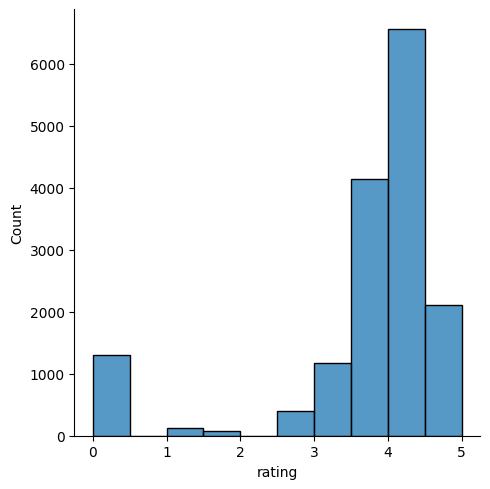

In [75]:
import seaborn as sns
sns.displot(df["rating"], kde=False, bins=10)

(0.0, 5000.0)

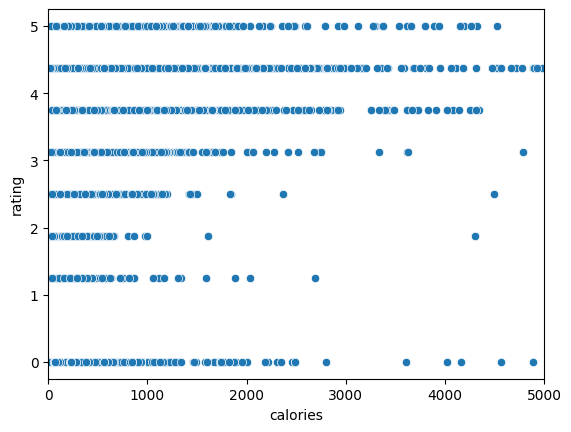

In [92]:
sns.scatterplot(df,x="calories",y="rating")
plt.xlim(0,5000)

In [119]:
srednie_proteiny = list()

In [135]:
srednie_proteiny = list()
unique_rating = df["rating"].unique()
for i in range(len(unique_rating)):
    srednie_proteiny.append(df.iloc[np.where(df['rating'] == df['rating'].unique()[i])]['protein'].mean())
    
srednie_kalorie = list()
for i in range(len(unique_rating)):
    srednie_kalorie.append(df.iloc[np.where(df['rating'] == df['rating'].unique()[i])]['calories'].mean())

sredni_tłuszcz = list()
for i in range(len(unique_rating)):
    sredni_tłuszcz.append(df.iloc[np.where(df['rating'] == df['rating'].unique()[i])]['fat'].mean())
    
srednia_sól = list()
for i in range(len(unique_rating)):
    srednia_sól.append(df.iloc[np.where(df['rating'] == df['rating'].unique()[i])]['sodium'].mean())

In [163]:
d={"rating":unique_rating, "calories":srednie_kalorie, "protein":srednie_proteiny, "fat": sredni_tłuszcz, "sodium":srednia_sól }
srednie=pd.DataFrame(d)
srednie

,rating,calories,protein,fat,sodium
0,2.500,383.412346,14.002469,20.669136,500.422222
1,4.375,11719.218407,99.334096,670.768620,10980.907051
2,3.750,509.364120,22.241538,29.061654,737.929642
3,3.125,6206.152790,118.535622,345.786266,6426.191416
4,1.875,369.950617,10.259259,23.580247,647.037037
5,5.000,6611.415480,326.569801,261.745489,7433.448243
6,0.000,362.386574,11.230710,17.577932,575.885802
7,1.250,385.983740,14.747967,19.390244,420.650407


Text(0.5, 0, 'Ocena')

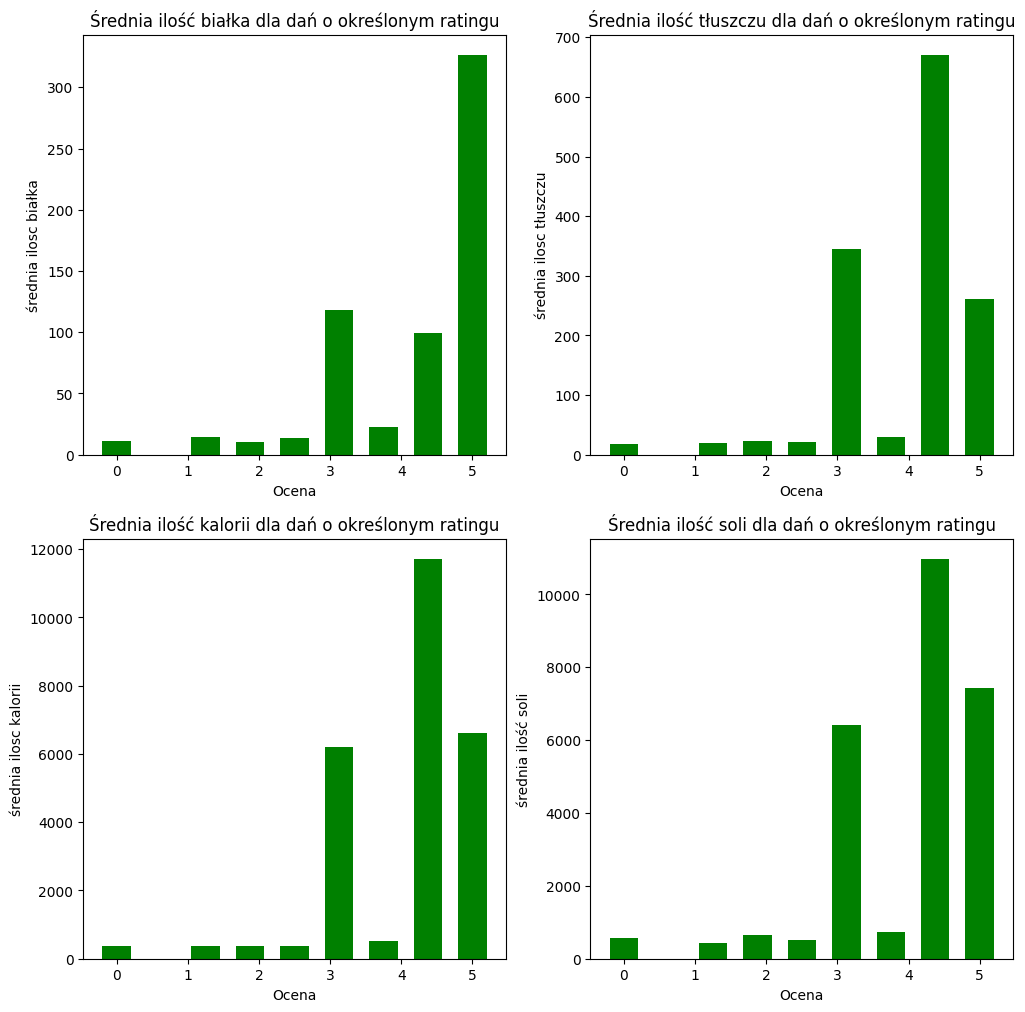

In [137]:
fig, ax = plt.subplots(2,2, figsize=(12,12)) 
bars=ax[0][0].bar(unique_rating, srednie_proteiny  , width=0.4, color="g")
ax[0][0].set_title("Średnia ilość białka dla dań o określonym ratingu")
ax[0][0].set_ylabel("średnia ilosc białka")
ax[0][0].set_xlabel("Ocena")

bars=ax[1][0].bar(unique_rating, srednie_kalorie  , width=0.4, color="g")
ax[1][0].set_title("Średnia ilość kalorii dla dań o określonym ratingu")
ax[1][0].set_ylabel("średnia ilosc kalorii")
ax[1][0].set_xlabel("Ocena")

bars=ax[0][1].bar(unique_rating, sredni_tłuszcz  , width=0.4, color="g")
ax[0][1].set_title("Średnia ilość tłuszczu dla dań o określonym ratingu")
ax[0][1].set_ylabel("średnia ilosc tłuszczu")
ax[0][1].set_xlabel("Ocena")

bars=ax[1][1].bar(unique_rating, srednia_sól , width=0.4, color="g")
ax[1][1].set_title("Średnia ilość soli dla dań o określonym ratingu")
ax[1][1].set_ylabel("średnia ilość soli")
ax[1][1].set_xlabel("Ocena")

In [161]:
df_heatmap=df[["rating","calories","protein","fat","sodium"]]
df_heatmap

,rating,calories,protein,fat,sodium
0,2.500,426.0,30.0,7.0,559.0
1,4.375,403.0,18.0,23.0,1439.0
2,3.750,165.0,6.0,7.0,165.0
3,3.125,547.0,20.0,32.0,452.0
4,4.375,948.0,19.0,79.0,1042.0
...,...,...,...,...,...
15859,3.125,28.0,2.0,2.0,64.0
15860,4.375,671.0,22.0,28.0,583.0
15861,4.375,563.0,31.0,38.0,652.0
15862,4.375,631.0,45.0,24.0,517.0


In [165]:
srednie.set_index("rating")

,calories,protein,fat,sodium
rating,,,,
2.500,383.412346,14.002469,20.669136,500.422222
4.375,11719.218407,99.334096,670.768620,10980.907051
3.750,509.364120,22.241538,29.061654,737.929642
3.125,6206.152790,118.535622,345.786266,6426.191416
1.875,369.950617,10.259259,23.580247,647.037037
5.000,6611.415480,326.569801,261.745489,7433.448243
0.000,362.386574,11.230710,17.577932,575.885802
1.250,385.983740,14.747967,19.390244,420.650407


In [169]:

srednie2=srednie[["calories","protein","fat","sodium"]]
srednie2

,calories,protein,fat,sodium
0,383.412346,14.002469,20.669136,500.422222
1,11719.218407,99.334096,670.768620,10980.907051
2,509.364120,22.241538,29.061654,737.929642
3,6206.152790,118.535622,345.786266,6426.191416
4,369.950617,10.259259,23.580247,647.037037
5,6611.415480,326.569801,261.745489,7433.448243
6,362.386574,11.230710,17.577932,575.885802
7,385.983740,14.747967,19.390244,420.650407


AttributeError: QuadMesh.set() got an unexpected keyword argument 'y'

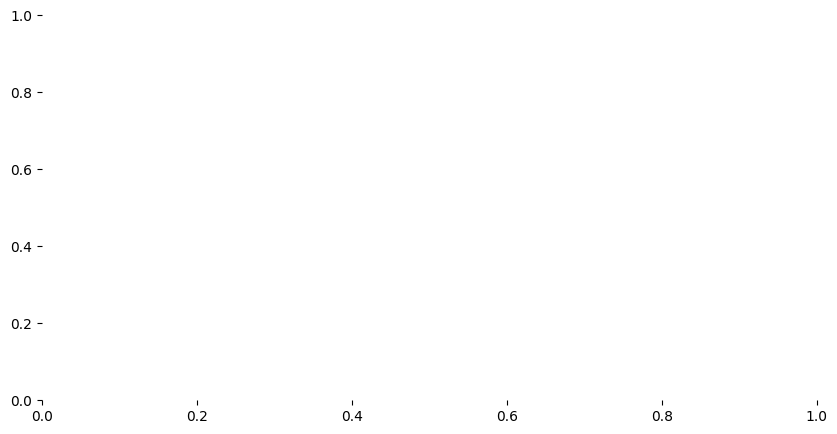

In [172]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data=srednie[["calories","protein","fat","sodium"]],y=srednie["rating"] , annot=True)
plt.show()

In [179]:
import plotly.express as px
srednie
fig = px.imshow(srednie2,
                x=["calories","protein","fat","sodium"],
                y=unique_rating
               )
fig.update_xaxes(side="top")
fig.show()